### Stock Market Prediction And Forecasting Using Stacked BiredictionalLSTM

In [48]:
### Data Collection
import pandas_datareader as pdr
key="cf9163cf030953d441cf033cb1cfc8d21401dc90"

In [49]:
df = pdr.get_data_tiingo('TSLA', api_key=key)

In [50]:
df.to_csv('HDFC.csv')

In [51]:
import pandas as pd

In [52]:
df=pd.read_csv('HDFC.csv')

In [53]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,TSLA,2021-05-03 00:00:00+00:00,684.90,706.0000,680.500,703.80,27043143,684.90,706.0000,680.500,703.80,27043143,0.0,1.0
1254,TSLA,2021-05-04 00:00:00+00:00,673.60,683.4464,657.701,678.94,29739319,673.60,683.4464,657.701,678.94,29739319,0.0,1.0
1255,TSLA,2021-05-05 00:00:00+00:00,670.94,685.2955,667.340,681.06,21901894,670.94,685.2955,667.340,681.06,21901894,0.0,1.0
1256,TSLA,2021-05-06 00:00:00+00:00,663.54,681.0200,650.000,680.76,27784619,663.54,681.0200,650.000,680.76,27784619,0.0,1.0
1257,TSLA,2021-05-07 00:00:00+00:00,672.37,690.0000,660.220,665.80,23469172,672.37,690.0000,660.220,665.80,23469172,0.0,1.0


In [54]:
df1=df.reset_index()['close']

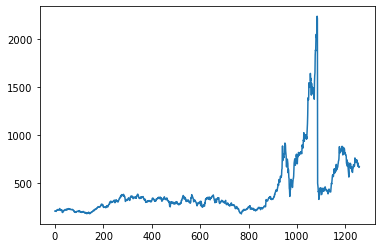

In [56]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [58]:
import numpy as np

In [59]:
df1

0       208.69
1       208.96
2       207.28
3       207.61
4       208.29
         ...  
1253    684.90
1254    673.60
1255    670.94
1256    663.54
1257    672.37
Name: close, Length: 1258, dtype: float64

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [61]:
print(df1)

[[0.01442873]
 [0.01455981]
 [0.01374419]
 ...
 [0.2388459 ]
 [0.23525328]
 [0.23954015]]


In [62]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [63]:
training_size,test_size

(880, 378)

In [65]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [66]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [67]:
print(X_train.shape), print(y_train.shape)

(779, 100)
(779,)


(None, None)

In [68]:
print(X_test.shape), print(ytest.shape)

(277, 100)
(277,)


(None, None)

In [69]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [70]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [113]:
from tensorflow.keras.layers import Bidirectional
model=Sequential()
model.add(Bidirectional(LSTM(100,return_sequences=True,input_shape=(100,1))))
model.add(Bidirectional(LSTM(100,return_sequences=True)))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [116]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 16s 290ms/step - loss: 0.0013 - val_loss: 0.0356
Epoch 2/100
13/13 [==============================] - 1s 90ms/step - loss: 2.4992e-04 - val_loss: 0.0152
Epoch 3/100
13/13 [==============================] - 1s 89ms/step - loss: 1.1376e-04 - val_loss: 0.0158
Epoch 4/100
13/13 [==============================] - 1s 95ms/step - loss: 1.0564e-04 - val_loss: 0.0124
Epoch 5/100
13/13 [==============================] - 1s 100ms/step - loss: 9.4282e-05 - val_loss: 0.0120
Epoch 6/100
13/13 [==============================] - 1s 95ms/step - loss: 7.1935e-05 - val_loss: 0.0116
Epoch 7/100
13/13 [==============================] - 1s 116ms/step - loss: 6.5755e-05 - val_loss: 0.0103
Epoch 8/100
13/13 [==============================] - 1s 114ms/step - loss: 6.1181e-05 - val_loss: 0.0096
Epoch 9/100
13/13 [==============================] - 1s 111ms/step - loss: 6.0585e-05 - val_loss: 0.0100
Epoch 10/100
13/13 [==============================] - 1s 101ms

In [117]:
model.summary()

### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_3 (Bidirection (None, 100, 200)          81600     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 100, 200)          240800    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 200)               240800    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 563,401
Trainable params: 563,401
Non-trainable params: 0
_________________________________________________________________


In [118]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [119]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

300.9635214608898

In [120]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

805.0572568288966

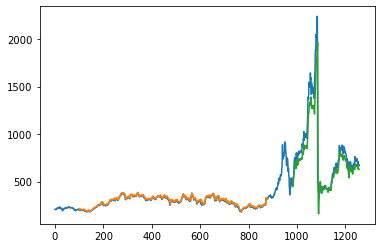

In [121]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [122]:
len(test_data)

378

In [123]:
x_input=test_data[278:].reshape(1,-1)
x_input.shape


(1, 100)

In [124]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [125]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

29537621 0.29242443 0.25999379 0.25239103 0.27335444
 0.24432221 0.24105972 0.26190176 0.24637097 0.23023333 0.2148142
 0.20341007 0.18644224 0.24012759 0.23744769 0.25276    0.24991018
 0.25680898 0.2417297  0.25383293 0.23021391 0.23104409 0.23838954
 0.23458331 0.21910107 0.22401422 0.21348882 0.20988649 0.22169843
 0.23738458 0.23438425 0.24860907 0.2488858  0.23886046 0.24508928
 0.24179767 0.25391547 0.28320986 0.2686015  0.27181544 0.27226694
 0.2600569  0.26217363 0.27437396 0.26251347 0.26722757 0.27149987
 0.25525542 0.25023546 0.24178796 0.25753721 0.24562332 0.2401373
 0.2388459  0.23525328 0.23954015 0.21687865 0.20522168 0.19262171
 0.1801914  0.1687111  0.15870893 0.15056419 0.14426509 0.13962543
 0.13634455 0.13410774 0.13259211 0.13148081]
13 day output [[0.13057944]]
14 day input [0.26999971 0.28013186 0.30929031 0.34035188 0.30693569 0.32550564
 0.32791852 0.32335007 0.31420346 0.3231316  0.32599598 0.32334521
 0.32414627 0.34073056 0.34184233 0.33265203 0.31870394 0

In [126]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [127]:
import matplotlib.pyplot as plt

In [128]:
len(df1)

1258

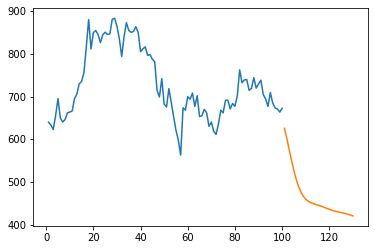

In [129]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

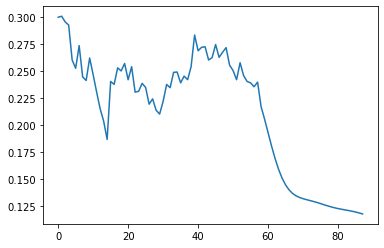

In [130]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [131]:
df3=scaler.inverse_transform(df3).tolist()

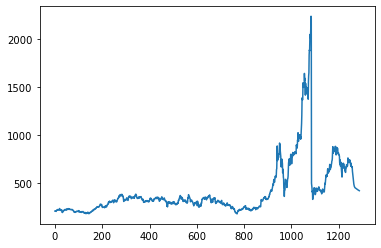

In [132]:
plt.plot(df3)